# [ONLINE NEWS DATASET](http://archive.ics.uci.edu/ml/datasets/Online+News+Popularity)

Summarizes a heterogeneous set of features about articles published by [Mashable](https://mashable.com/) in a period of two years. The goal is to predict the **number of shares in social networks (popularity)**.

In [1]:
# imports
import functools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df_original = pd.read_csv('./dataset_online.csv', sep=',', header=0)
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                              39644 non-null object
timedelta                        39644 non-null float64
n_tokens_title                   39644 non-null float64
n_tokens_content                 39644 non-null float64
n_unique_tokens                  39644 non-null float64
n_non_stop_words                 39644 non-null float64
n_non_stop_unique_tokens         39644 non-null float64
num_hrefs                        39644 non-null float64
num_self_hrefs                   39644 non-null float64
num_imgs                         39644 non-null float64
num_videos                       39644 non-null float64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null float64
data_channel_is_lifestyle        39644 non-null float64
data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus              39644 non-null floa

In [3]:
df_original.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [4]:
df_original.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [5]:
df_original.columns
df_original.shape
dataset = df_original.replace(0, np.nan)

## Data exploitation

In [6]:
# auxiliar functions
def sum_dict(dictionary):
    return {key: sum(dictionary[key]) for key in dictionary}

def plot_bar(dictionary):
    index = np.arange(len(list(dictionary.keys())))
    plt.bar(index, list(dictionary.values()))
    plt.xticks(index, dictionary.keys(), rotation=30)
    plt.show()
    
df = df_original

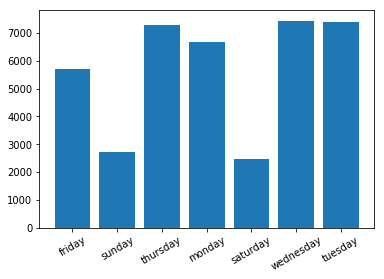

In [7]:
week = {
    'monday': df['weekday_is_monday'],
    'tuesday': df['weekday_is_tuesday'],
    'wednesday': df['weekday_is_wednesday'],
    'thursday': df['weekday_is_thursday'],
    'friday': df['weekday_is_friday'],
    'saturday': df['weekday_is_saturday'],
    'sunday': df['weekday_is_sunday']
}

plot_bar(sum_dict(week))

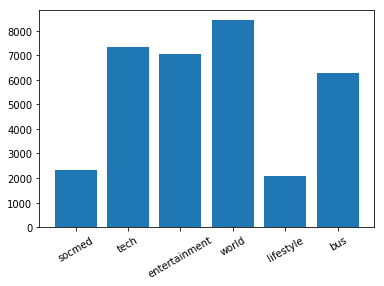

In [8]:
channel = {
    'lifestyle': df['data_channel_is_lifestyle'],
    'bus': df['data_channel_is_bus'],
    'entertainment': df['data_channel_is_entertainment'],
    'socmed': df['data_channel_is_socmed'],
    'tech': df['data_channel_is_tech'],
    'world': df['data_channel_is_world'],
}

# data_channel = pd.DataFrame(data=channel)
plot_bar(sum_dict(channel))

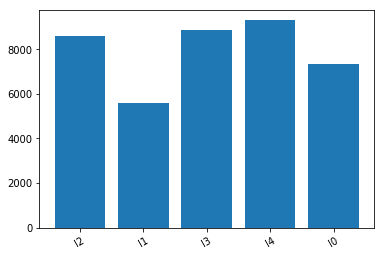

In [9]:
ld = {
    'l0': df['LDA_00'],
    'l1': df['LDA_01'],
    'l2': df['LDA_02'],
    'l3': df['LDA_03'],
    'l4': df['LDA_04'],
}

# lda = pd.DataFrame(data=ld)
plot_bar(sum_dict(ld))

## Feature Selection

In [10]:
# Remove non-predictive atributes
df.drop(['url', 'timedelta'], axis=1, inplace=True)

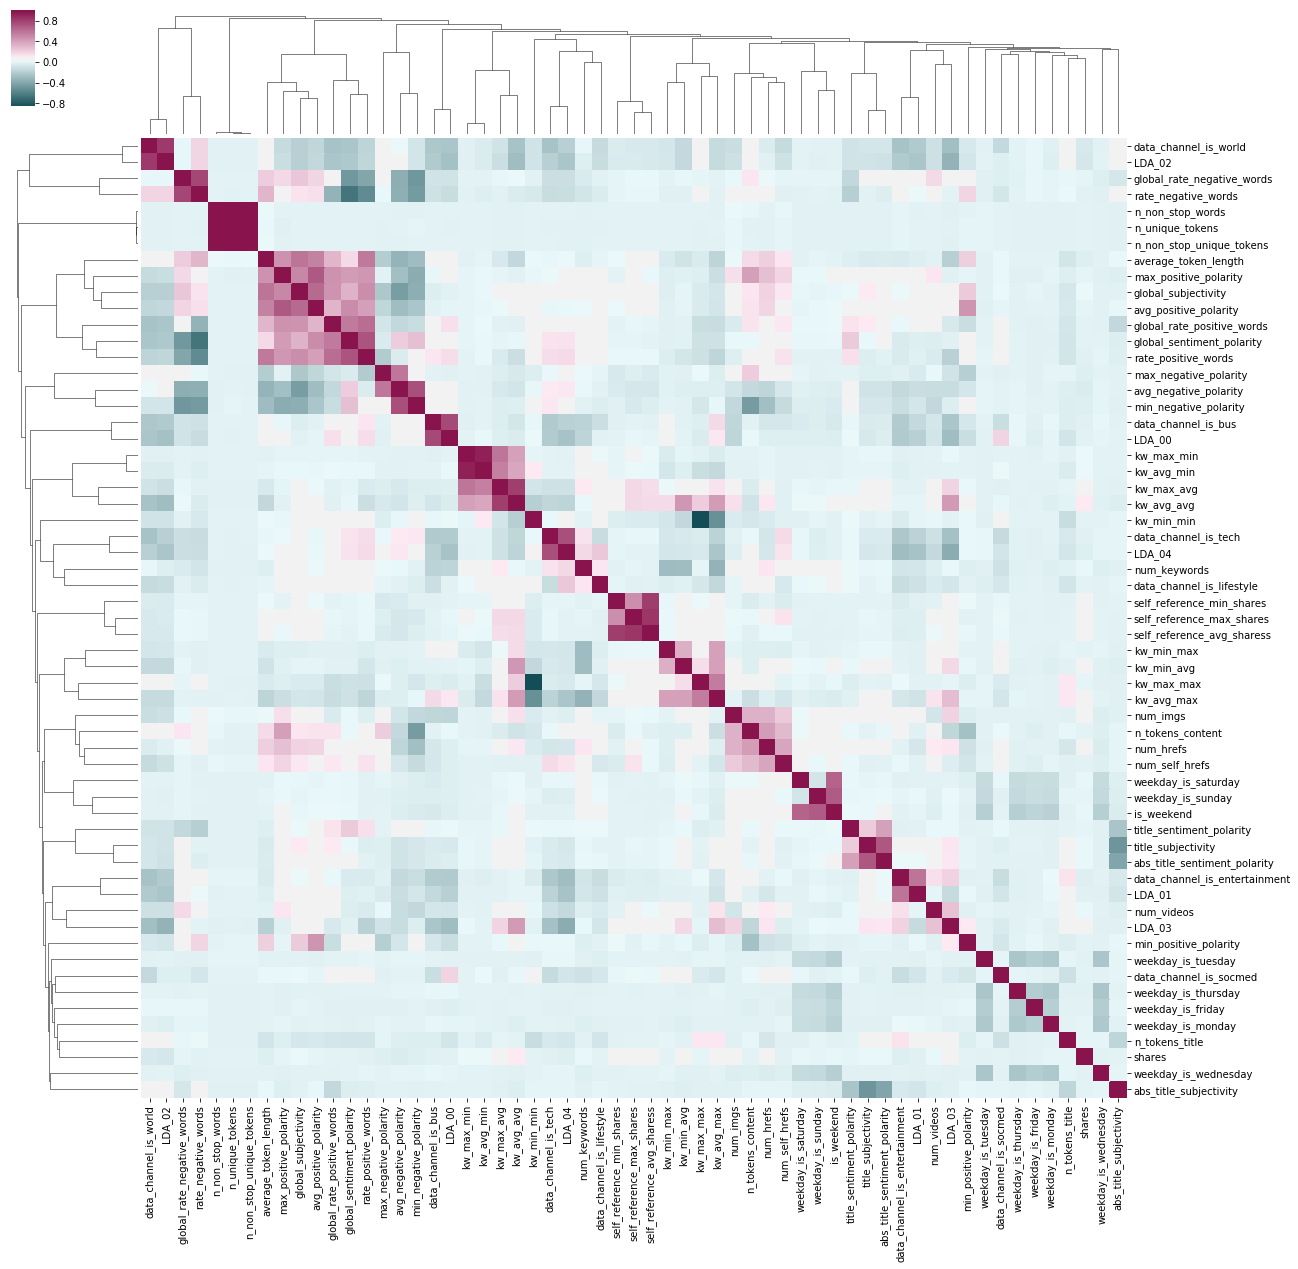

In [11]:
# Clustermap with correlations
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True, center="light")
sns.clustermap(df.corr(), figsize=(20, 20), cmap=cmap);

<BarContainer object of 58 artists>

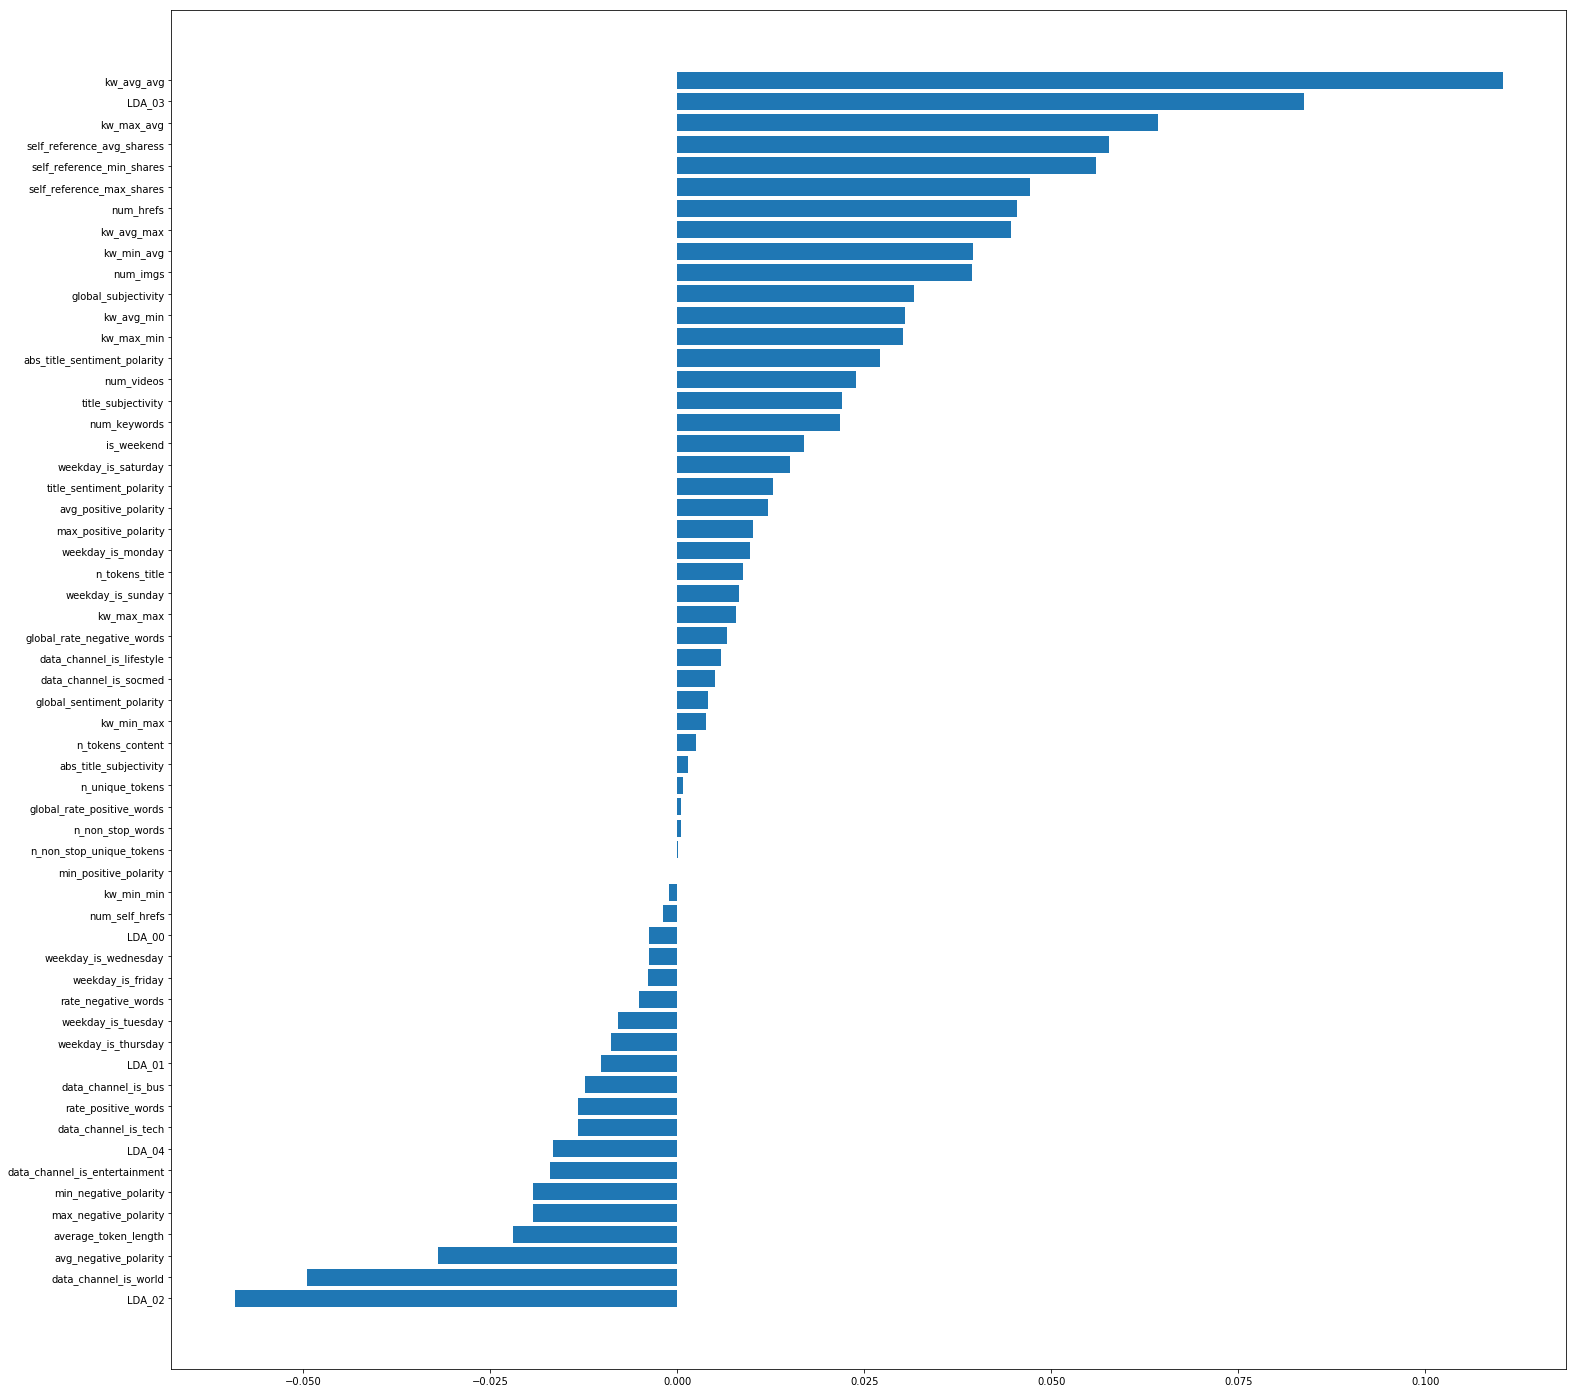

In [12]:
# Correlation to shares
cr = df.corr()['shares'].sort_values(ascending=True)
cr.drop(['shares'], axis=0, inplace=True)
plt.figure(figsize=[25,25])
plt.barh(cr.keys(), cr.values)

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

array = df.values
array_len = len(df.columns)
X = array[:,0:array_len-1]
Y = array[:,array_len-1]

model = ExtraTreesClassifier()
model.fit(X, Y)

/home/mateus/scikit-learn/sklearn/ensemble/forest.py:247: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Feature ranking:
1. feature 25 (0.025342)
2. feature 39 (0.024937)
3. feature 19 (0.024932)
4. feature 38 (0.024926)
5. feature 24 (0.024905)
6. feature 22 (0.024871)
7. feature 40 (0.024778)
8. feature 9 (0.024502)
9. feature 41 (0.024469)
10. feature 37 (0.024386)
11. feature 44 (0.024254)
12. feature 0 (0.024240)
13. feature 42 (0.024163)
14. feature 4 (0.023957)
15. feature 2 (0.023815)
16. feature 48 (0.023708)
17. feature 43 (0.023658)
18. feature 18 (0.023512)
19. feature 51 (0.023463)
20. feature 5 (0.023434)
21. feature 46 (0.023418)
22. feature 45 (0.023372)
23. feature 1 (0.023352)
24. feature 47 (0.022989)
25. feature 52 (0.022328)
26. feature 53 (0.021903)
27. feature 26 (0.021832)
28. feature 6 (0.021736)
29. feature 28 (0.021673)
30. feature 23 (0.021368)
31. feature 27 (0.021181)
32. feature 10 (0.020732)
33. feature 50 (0.020335)
34. feature 49 (0.020124)
35. feature 20 (0.019772)
36. feature 7 (0.019385)
37. feature 54 (0.019123)
38. feature 56 (0.018055)
39. feature 

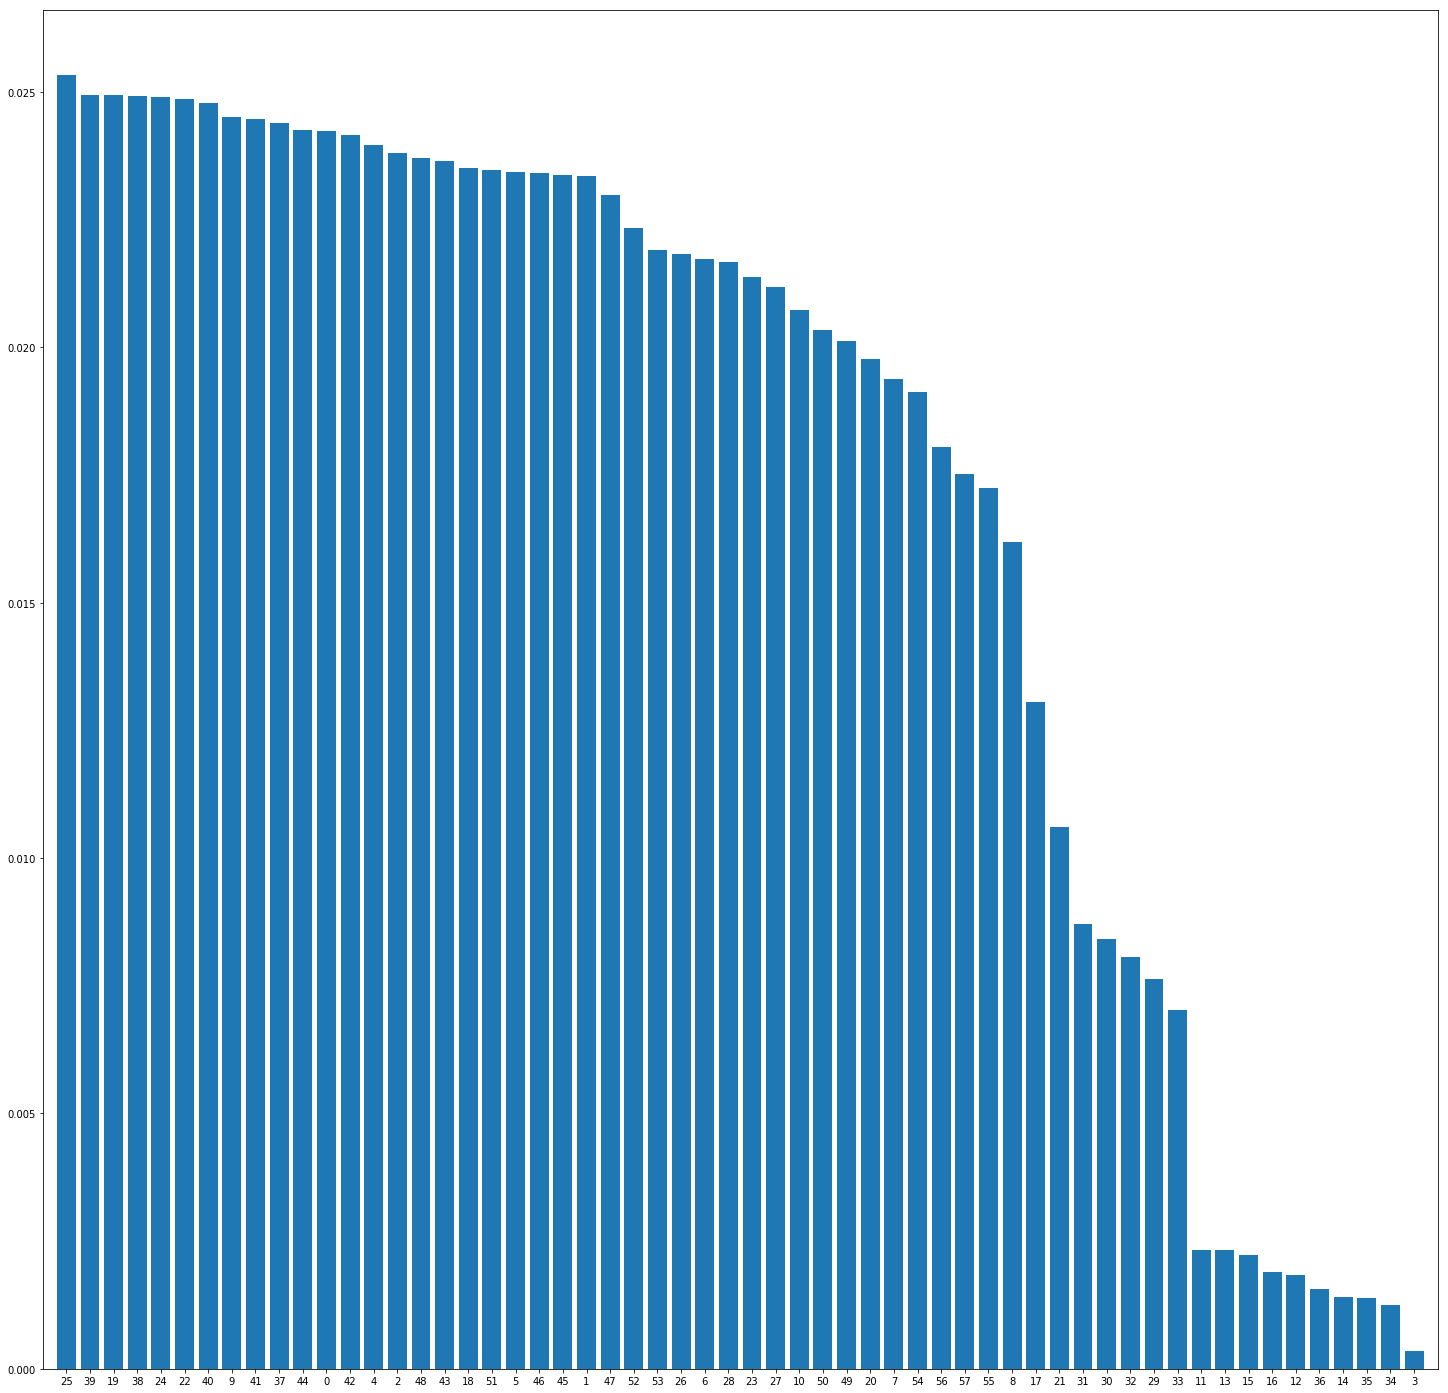

In [14]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=[25,25])
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [15]:
model_sel = SelectFromModel(model, prefit=True)
X_new = model_sel.transform(X)
print(X_new.shape)
print(model_sel.get_support())

(39644, 40)
[ True  True  True False  True  True  True  True False  True  True False
 False False False False False False  True  True  True False  True  True
  True  True  True  True  True False False False False False False False
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]


In [16]:
dict_columns = dict(zip(df.columns, model_sel.get_support()))
remove_columns = [k for k,v in dict_columns.items() if v == False]
print(remove_columns)

['n_non_stop_words', 'weekday_is_saturday', 'weekday_is_wednesday', 'data_channel_is_world', 'data_channel_is_bus', 'kw_max_max', 'kw_min_min', 'is_weekend', 'weekday_is_tuesday', 'data_channel_is_socmed', 'weekday_is_sunday', 'data_channel_is_entertainment', 'weekday_is_friday', 'data_channel_is_lifestyle', 'weekday_is_thursday', 'num_videos', 'data_channel_is_tech', 'weekday_is_monday']


In [17]:
df.drop(remove_columns, axis=1, inplace=True)
df.to_csv('dataset.csv')

# Randon Florest

É um algoritmo de aprendizagem de máquina flexível e fácil de usar que produz excelentes resultados a maioria das vezes, mesmo sem ajuste de hiperparâmetros

### Funcionamento

Esse algoritmo cria uma “floresta” que é uma combinação de árvores de decisão, na maioria dos casos treinados com o método de bagging. A idéia principal do método de bagging é que a combinação dos modelos de aprendizado aumentando o resultado geral.

Sendo mais claro o algoritmo RandonFlorest cria várias árvores de decisão e as combina para obter uma predição com maior acurácia e mais estável.

O algoritmo de RandonFlorest adiciona aleatoriedade extra ao modelo quando está criando as árvores. Ao invés de procurar pela melhor característica ao fazer a partição de nós, ele busca a melhor característica em um subconjunto aleatório das características. Este processo cria uma grande diversidade, o que geralmente leva a geração de modelos melhores.


### Importância das caracteristicas

Outra grande qualidade do RandonFlorest é a facilidade para se medir a importância relativa de cada característica (feature) para a predição. 


Sklearn provê uma excelente ferramenta para isto, que mede a importancia das características analisando quantos nós das árvores, que usam uma dada característica, reduzem impureza geral da "floresta". Ele calcula este valor automaticamente para cada característica após o treinamento e normaliza os resultados para que a soma de todas as importancias seja igual a 1.


Através da inspeção da importância das características, você pode decidir quais características deixar de fora do modelo, já que eles não contribuem o suficiente ou nada para o processo de predição. Isto é importante, porque uma regra geral em aprendizagem de máquina é que quanto mais características você tem, mais provavelmente seu modelo irá sofrer de superajuste (overfitting) e vice versa.

### Diferenças

Se você treinar uma árvore de decisão com um dataset de treinamento e rótulos, ela vai elaborar um conjunto de regras que serão utilizadas para realizar predições.

Por exemplo, se você quiser prever se uma pessoa vai clicar em um anúncio online, você pode colecionar anúncios que a pessoa clicou no passado e algumas características que descrevam esta decisão. Se você colocar as características e rótulos em uma árvore de decisão ela vai gerar nos e algumas regras. Você poderá então prever ser o anúncio será clicado ou não. Quando uma árvore de decisão gera regras e nodos, normalmente utiliza calculos de ganho de informação. Por outro lado, a RandonFlorest faz isto de modo aleatório.

Outra diferença é que árvores de decisão profundas podem sofrer de sobreajuste (overfitting). RandonFlorest evitam o sobreajuste na maioria dos casos, pois trabalha com subconjuntos aleatórios das características e constrói árvores menores a partir de tais subconjuntos. Depois do treinamento, as subárvores são combinadas. Esta abordagem torna a computação mais lenta, dependendo de quantas árvores serão construiídas pelo Floresta Aleatória.


### Hiperparâmetros Importantes

#### Aumentando o poder de predição
**n_estimators**
, que indica o número de árvores construídas pelo algoritmo antes de tomar uma votação ou fazer uma média de predições. Em geral, uma quantidade elevada de árvores aumenta a performance e torna as predições mais estáveis, mas também torna a computação mais lenta.

**max_features**, que indica o número máximo de características a serem utilizadas pelo Floresta Aleatória na construção de uma dada árvore. Sklearn oferece várias opções, descritas na sua documentação.

**min_sample_leaf** Este parâmetro indica o número mínimo de folhas que devem existir em uma dada árvore.

#### Aumentando a velocidade do modelo
**n_jobs** informa quantos processadores o algoritmo pode utilizar. Se ele tiver valor 1, pode utilizar apenas um processador. O valor -1 significa que não há limite na quantidade de processadores a ser utilizada.

**random_state** torna o resultado do modelo replicável. O modelo será produzido do mesmo modo se ele tiver um valor definido de random_state e se forem utilizados os mesmos parâmetros com o mesmos dados de treinamento.

**oob_score**(também chamado de oob sampling), que é um método de validação cruzada para floresta aleatória. Neste tipo de amostragem (sampling), cerca de um terço dos dados não é utilizado no treinamento e pode ser utilizado para avaliar a performance. Estas amostras são chamadas out of the bag samples. É uma técnica similar ao método de validação cruzada leave one out, mas sem nenhum custo computacional extra.



### Resumo

- Muito bom para primeiros estágios de criação de desenvolvimento de um modelo
- Provê um bom indicador de importância para as características;
- Apresenta boa perfomance;
- É possível trabalhar com diferentes tipos de entrada

geralmente rápida, simples e flexível embora ainda apresente limitações